In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1, max(1, len(model_history.history['accuracy']) // 10)))
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1, max(1, len(model_history.history['loss']) // 10)))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/MachineLearning /FaceRecognitionCNN/train'
val_dir = '/content/drive/MyDrive/MachineLearning /FaceRecognitionCNN/train'

num_train = 2870
num_val = 717
batch_size = 64
num_epoch = 10

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.load_weights('/content/drive/MyDrive/TestDataSet/model.h5')
cv2.ocl.setUseOpenCL(False)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('/content/drive/MyDrive/TestDataSet/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('Video', cv2.resize(frame, (500, 500), interpolation=cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 941s 19s/step - accuracy: 0.8586 - loss: 0.3912 - val_accuracy: 0.9730 - val_loss: 0.1363 - learning_rate: 1.0000e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 657s 15s/step - accuracy: 0.8644 - loss: 0.3838 - val_accuracy: 0.9815 - val_loss: 0.1349 - learning_rate: 1.0000e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 553s 13s/step - accuracy: 0.8680 - loss: 0.3785 - val_accuracy: 0.9830 - val_loss: 0.1213 - learning_rate: 1.0000e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 417s 10s/step - accuracy: 0.8666 - loss: 0.3574 - val_accuracy: 0.9759 - val_loss: 0.1393 - learning_rate: 1.0000e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 353s 8s/step - accuracy: 0.8599 - loss: 0.3566 - val_accuracy: 0.9801 - val_loss: 0.1375 - learning_rate: 1.0000e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 342s 8s/step - accuracy: 0.8670 - loss: 0.3617 - val_accuracy: 0.9787 - val_loss: 0.1401 - learning_rate: 1.0000e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 311s 7s/step - accuracy: 0.8748 - loss:

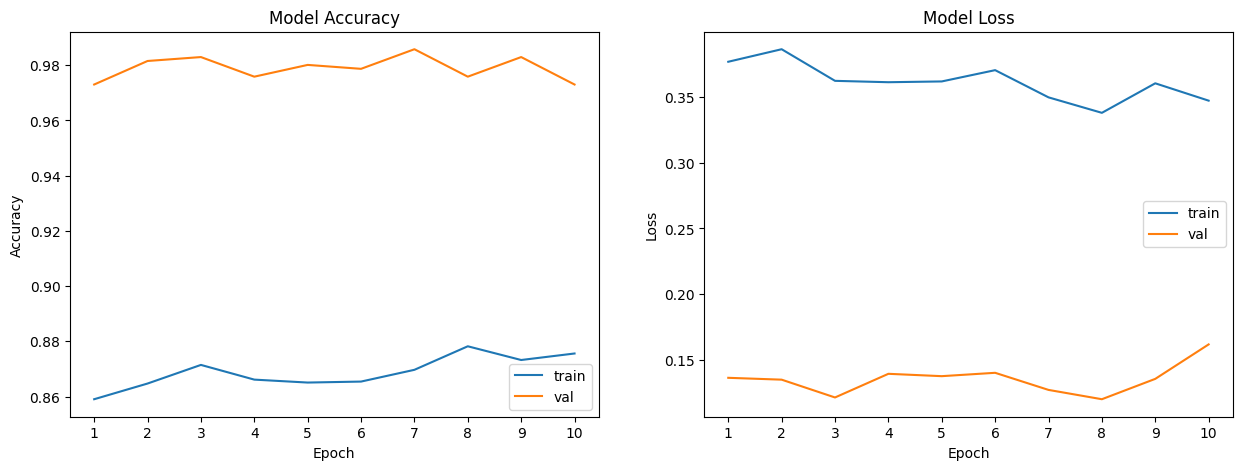

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(lr_schedule)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
model_info = model.fit(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val // batch_size,
    callbacks=[lr_scheduler]
)
plot_model_history(model_info)
model.save_weights('model.weights.h5')

In [ ]:
import cv2
import numpy as np
img_path = '/content/drive/MyDrive/MachineLearning /FaceRecognitionCNN/mad_sample.png'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray, (48, 48))
input_img = np.expand_dims(np.expand_dims(resized_img, -1), 0) / 255.0
prediction = model.predict(input_img)
maxindex = int(np.argmax(prediction))
emotion = emotion_dict[maxindex]

print(f"Predicted Emotion: {emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Emotion: Angry


In [ ]:
model.save('/content/drive/MyDrive/MachineLearning/FaceRecognitionCNN/model.h5')
model.save('/content/drive/MyDrive/MachineLearning/FaceRecognitionCNN/model.keras')
